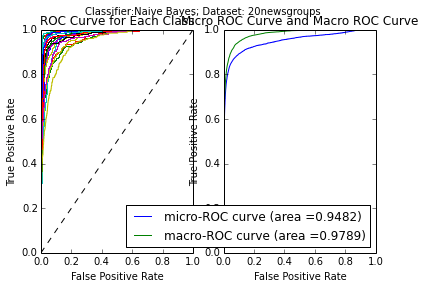

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# import data
newsgroups_train = fetch_20newsgroups_vectorized(subset='train')
data_train = newsgroups_train.data
target_train =  newsgroups_train.target

newsgroups_test = fetch_20newsgroups_vectorized(subset='test')
data_test = newsgroups_test.data
target_test = newsgroups_test.target

n_samples, n_features = data_train.shape
n_classes = np.unique(target_train).shape[0]


# classify and calculate scores
classifier = OneVsRestClassifier(MultinomialNB())
y_score = classifier.fit(data_train,target_train).predict_proba(data_test)

# binarize the target classes of test set
y_true = label_binarize(target_test,range(n_classes))

# for each class, compute ROC curve and AUC
fpr,tpr = dict(),dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:,i],y_score[:,i])
    roc_auc[i] = auc(fpr[i],tpr[i])

# for each class, plot ROC curve 
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
for i in range(n_classes):
    plt.plot(fpr[i],tpr[i],'-',\
        label='ROC curve of class {0}(area ={1:0.4f})'.format(i,roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')    
# plt.xlim([-0.05,1.0])
# plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.suptitle('Classifier:Naive Bayes; Dataset: 20newsgroups')
# plt.legend(loc="lower right")



# compute micro ROC curve and AUC
# each document weights equal
micro_true = y_true.ravel()
micro_score = y_score.ravel()
fpr['micro'], tpr['micro'], _ = roc_curve(micro_true,micro_score)
roc_auc['micro'] = auc(fpr['micro'],tpr['micro'])


# compute macro AUC
# each class weights equal
roc_auc['macro2'] = np.average([roc_auc[i] for i in range(n_classes)])

# compute macro ROC curve

# the false_positive_rate samples for differnet classes vary
# get all false_positive_rate samples
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# calculate average true_positive_rates at all false_positive_rates samples,
# using linear interpolation
all_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    all_tpr += interp(all_fpr, fpr[i], tpr[i])

all_tpr = all_tpr/float(n_classes)
fpr['macro'] = all_fpr
tpr['macro'] = all_tpr
roc_auc['macro'] = auc(fpr['macro'], tpr['macro'])


# plot micro and macro ROC curve
ax2 = fig.add_subplot(1,2,2)
plt.plot(fpr['micro'],tpr['micro'],'-',\
    label='micro-ROC curve (area ={0:0.4f})'.format(roc_auc['micro']))

plt.plot(fpr['macro'],tpr['macro'],'-',\
    label='macro-ROC curve (area ={0:0.4f})'.format(roc_auc['macro']))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro ROC Curve and Macro ROC Curve')
# plt.subtitle('Classifier:Naive Bayes; Dataset: 20newsgroups')
plt.legend(loc="lower right")
plt.show()
